# MethodSelection_v11

Selects Methods from the output of ClusterModeling_V8

## Overview:
- I have compiled a data set with ~700 unique gait re-training sessions. Subject demographics, training methods, and a binary target outcome, AE, are included in this data set.
- A hyperparameterization of model features for several classifiers were trained/tested and 5 random additive (e.g., temporal adding) subsets of the dataset.  For each classifier and the 5 different training/testing data splits, model performance metrics are computed.
- In this notebook, Model performance metrics (e.g., AUC-ROC, Precision@XX%, and Recall@XX%) are anaylized to select the best performing (on average high and consistent performance for the performance metrics).
- The selected models are further analyzed in order to determine which features are important and what intuition can be gained from these models.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns # Also to visualize

In [2]:
ModelResults = pd.read_csv("ModelResults_TemporalAdding_AE_SQL_2020_10_15.csv")
Outcome= "TMAfterGood"
Method = ""

In [ ]:
ModelResults = ParseFearues(ModelResults)
Features = ['C(speed_ratio)[T.3.0]', 'speed_diff', 'mid_speed', 'C(abrupt)[T.1.0]',  'duration', 'C(catch)[T.1.0]', 'age', 'C(young)[T.1]','base', 'height', 'weight','bmi', 'C(clinical)[T.1.0]']

ModelResults.tail()

# Plotting Functionality

In [3]:
def ByMetric(df, MetricMean, MetricVar, MetricAll, current_palette, MinRange=0, MaxVar=0):
    # Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
    f, axes = plt.subplots(1, 3, sharex=False, figsize = (16, 8))
    
    ModelList = np.unique(ModelResults['Classifier'])
    
    for m in range(len(ModelList)):

        M_Name = ModelList[m]
        M_index = ModelResults[ModelResults['Classifier'] == M_Name].index.values

        # Subplot 1
        sns.distplot(df[MetricMean].loc[M_index], ax=axes[0], color=current_palette[m], label=M_Name)#formerly iloc
        axes[0].set_title(Outcome + ": " + MetricMean + " Distribution")
        axes[0].set_ylabel("Count")

        # Subplot 2
        axes[1].set_title(Outcome + ": " + MetricMean + " and " + MetricVar + " Variability")
        sns.scatterplot(x=MetricMean, y=MetricVar, data=df.loc[M_index], ax=axes[1], color=current_palette[m], label=M_Name)
        #Formerly iloc
        
        # Subplot 3
        axes[2].set_title(Outcome + ": " + MetricMean + " Behavior Over Folds")
        axes[2].set(xticks=np.arange(6), yticks=[0, .25, .50, .75, 1.0])
        if Method == "Addition":
            fold=["YA31->YA21", "YA->YG", "Y->Old", "Intact->Stroke"]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        else:
            fold=[1, 2, 3, 4]
            for here in M_index:
                str1 = df[MetricAll].loc[here]#Formerly iloc
                str1 = str1.replace(']','').replace('[','')
                l = str1.replace('"','').split(",")
                l1 = [float(i) for i in l] 
                #print(l1)
                axes[2].plot(fold, l1, color=current_palette[m], alpha=0.5)
            plt.xlabel('Fold')
        plt.ylabel(MetricMean)
    
    if MinRange != 0:
        #print(df.loc[M_index, MetricMean].max())
        [l_xlim, r_xlim] = axes[1].get_xlim()
        axes[1].fill([MinRange, r_xlim, r_xlim, MinRange], [0, 0, MaxVar, MaxVar], "k", alpha=.3) 
        BestIndex= ModelResults[(ModelResults[MetricMean] > MinRange) & (ModelResults[MetricVar] < MaxVar) ].index.values
        return BestIndex
 
    f.legend()
    #plt.savefig('GroupCrossValidation.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show

# AUC-ROC Analysis
### Defining acceptable average performance and variability 

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-t

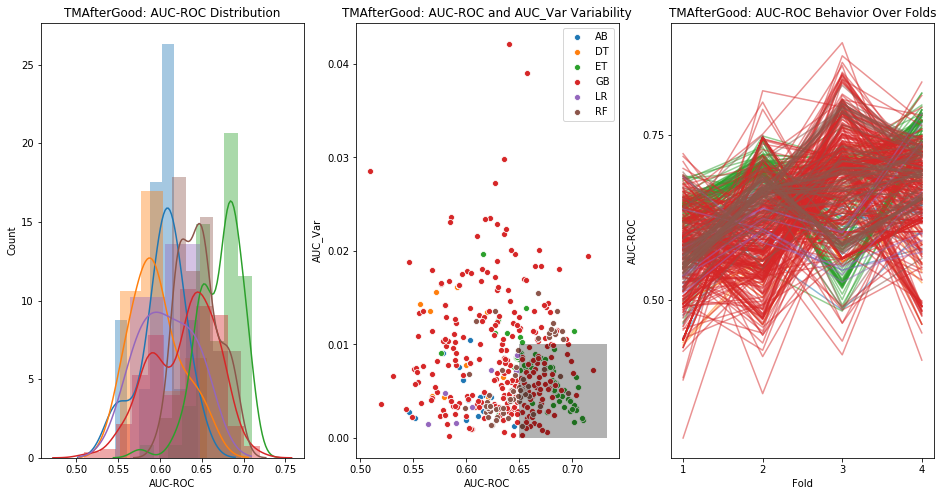

In [4]:
current_palette = sns.color_palette()
BestAUCIndex = ByMetric(ModelResults, 'AUC-ROC', "AUC_Var", "All_AUC", current_palette, 0.65, 0.01)

# Precision

### Defining acceptable average performance and variability 

In [5]:
#BestPrecIndex_50 = ByMetric(ModelResults, 'Precision_50%', "Precision_50%_Var", "All_Precision_50%", current_palette, 0.9, 0.005)

In [6]:
#BestPrecIndex_60 = ByMetric(ModelResults, 'Precision_60%', "Precision_60%_Var", "All_Precision_60%", current_palette, 0.9, 0.005)

In [7]:
#BestPrecIndex_70 = ByMetric(ModelResults, 'Precision_70%', "Precision_70%_Var", "All_Precision_70%", current_palette, 0.9, 0.002)

In [8]:
#BestPrecIndex_80 = ByMetric(ModelResults, 'Precision_80%', "Precision_80%_Var", "All_Precision_80%", current_palette, 0.9, 0.002)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-t

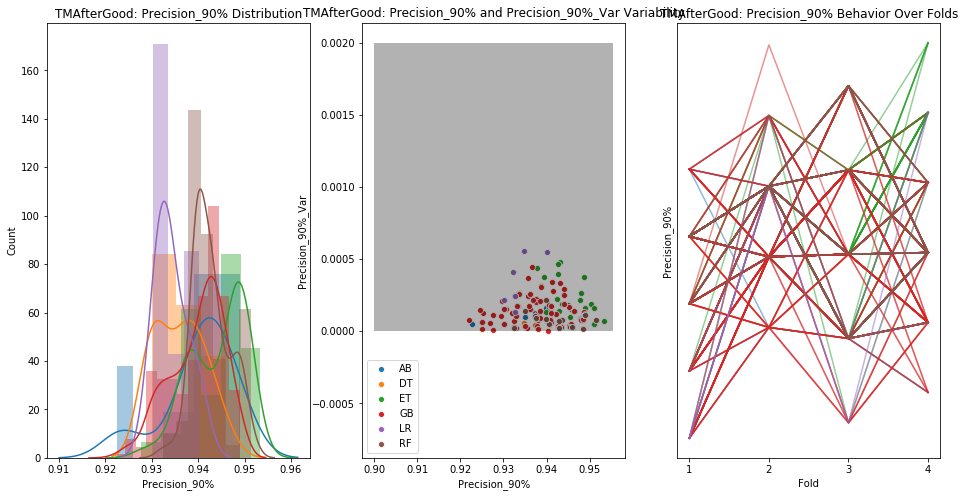

In [9]:
BestPrecIndex_90 = ByMetric(ModelResults, 'Precision_90%', "Precision_90%_Var", "All_Precision_90%", current_palette, 0.9, 0.002)

# Recall
### Defining acceptable average performance and variability 

In [10]:
#BestRecallIndex_50 = ByMetric(ModelResults, 'Recall_50%', "Recall_50%_Var", "All_Recall_50%", current_palette, 0.6, 0.002)

In [11]:
#BestRecallIndex_60 = ByMetric(ModelResults, 'Recall_60%', "Recall_60%_Var", "All_Recall_60%", current_palette, 0.68, 0.002)

In [12]:
#BestRecallIndex_70 = ByMetric(ModelResults, 'Recall_70%', "Recall_70%_Var", "All_Recall_70%", current_palette, 0.80, 0.002)

In [13]:
#BestRecallIndex_80 = ByMetric(ModelResults, 'Recall_80%', "Recall_80%_Var", "All_Recall_80%", current_palette, 0.8, 0.0015)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-t

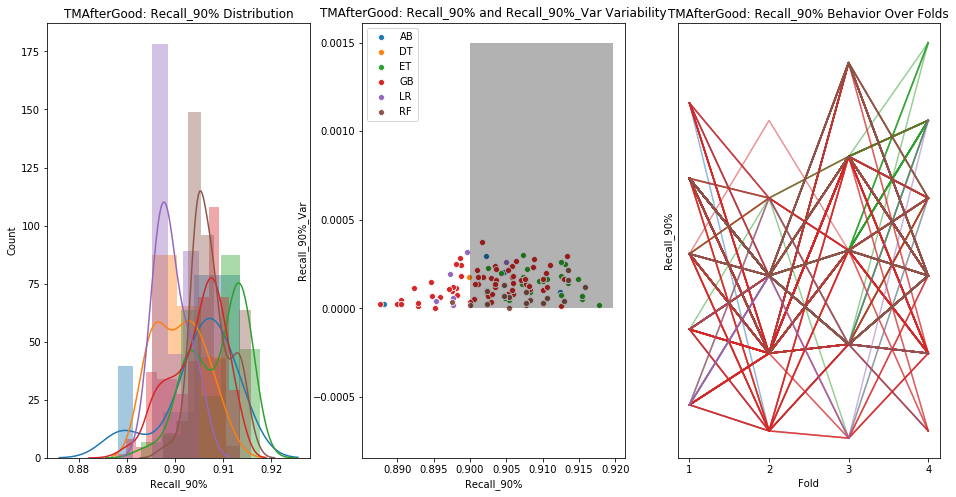

In [14]:
BestRecallIndex_90 = ByMetric(ModelResults, 'Recall_90%', "Recall_90%_Var", "All_Recall_90%", current_palette, 0.9, 0.0015)

# Select the 'best' Models

In [15]:
pd.set_option('display.max_colwidth', None)#-1

BestModels = list(set(BestRecallIndex_90) & set(BestPrecIndex_90) & set(BestAUCIndex))
ModelResults['Best']=0
ModelResults.loc[BestModels, 'Best'] = 1
ModelResults.loc[BestModels, ['Model', 'AUC-ROC']]

,Model,AUC-ROC
3,DecisionTreeClassifier(max_depth=5),0.656439
18,"RandomForestClassifier(max_depth=2, n_estimators=10)",0.652392
24,"RandomForestClassifier(max_depth=5, n_estimators=10)",0.663173
27,"RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,\n n_estimators=10)",0.696528
30,"RandomForestClassifier(max_depth=10, n_estimators=10)",0.688792
...,...,...
462,"GradientBoostingClassifier(learning_rate=1, max_depth=5, min_samples_split=10,\n n_estimators=1000, subsample=0.5)",0.651766
463,"GradientBoostingClassifier(learning_rate=1, max_depth=10, min_samples_split=10,\n n_estimators=1000, subsample=0.5)",0.719780
464,"GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=1000)",0.667963
465,"GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=1000)",0.668811


# What threshold should be used for precision and recall?

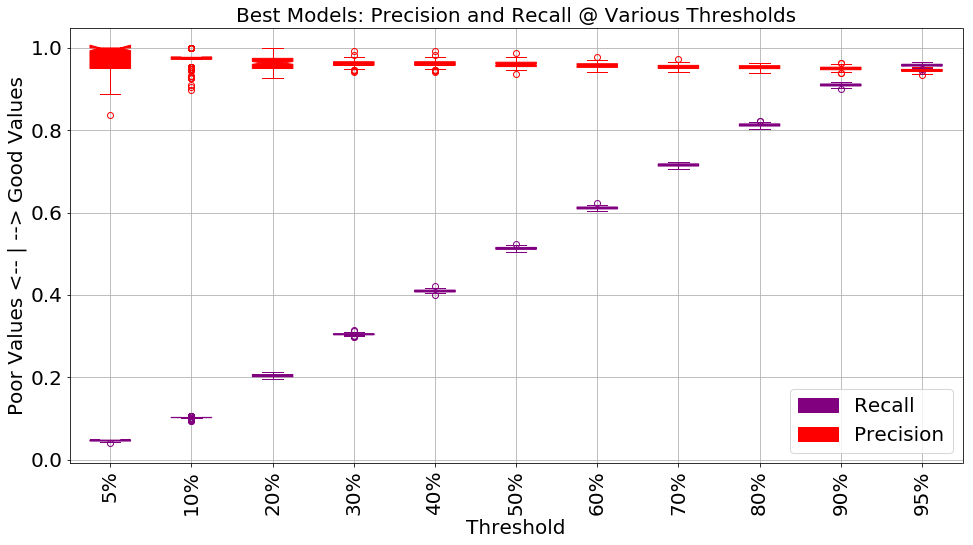

In [16]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (16, 8))

## First Subplot
AllPrecision=['Precision_5%','Precision_10%','Precision_20%','Precision_30%','Precision_30%', 'Precision_40%',
           'Precision_50%', 'Precision_60%', 'Precision_70%', 'Precision_80%', 'Precision_90%', 'Precision_95%']

#axes3[0].set_title("Best Model Feature Imporance")
c =  "red"
ModelResults.loc[BestModels, AllPrecision].boxplot(figsize = (16, 8), rot=90, 
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            );

## Second Subplot
AllRecall=['Recall_5%','Recall_10%','Recall_20%','Recall_30%', 'Recall_40%', 'Recall_50%',
              'Recall_60%', 'Recall_70%', 'Recall_80%', 'Recall_90%', 'Recall_95%']

#axes3[0].set_title("Best Model Feature Imporance")
c2 = "purple"
ModelResults.loc[BestModels, AllRecall].boxplot(rot=90,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=c2, color=c2),
            capprops=dict(color=c2),
            whiskerprops=dict(color=c2),
            flierprops=dict(color=c2, markeredgecolor=c2),
            medianprops=dict(color=c2),
            );


Recall_patch = mpatches.Patch(color=c2, label='Recall')
Precision_patch = mpatches.Patch(color=c, label='Precision')
plt.legend(handles=[Recall_patch, Precision_patch], prop={"size":20})

ax.set_title("Best Models: Precision and Recall @ Various Thresholds", fontsize=20)
ax.set_xticklabels(['5%', '10%', '20%','30%','40%','50%','60%','70%','80%','90%','95%'], fontsize=20)
ax.set_xlabel("Threshold", fontsize=20)
ax.set_ylabel("Poor Values <-- | --> Good Values", fontsize=20)


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels() ): 
    item.set_fontsize(20)
        
#plt.savefig('Threshold_PrecisionRecall.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
plt.show()

# Definition of the Best Models

In [17]:
import matplotlib.patches as mpatches

def SubplotPerformanceMetric(axes, df, MetricAll, Lame_index, Best_index, current_palette):

    fold=[20, 40, 60, 80]
    axes.set_title(MetricAll + " Over Subsets of Data")
    axes.set(xticks=fold, yticks=[0, .20, .40, .60, .80, 1.0])
    
    # lame models
    for Lame_here in Lame_index:
        
        str1 = df[MetricAll].loc[Lame_here]#Formerly iloc
        str1 = str1.replace(']','').replace('[','')
        l = str1.replace('"','').split(",")
        l1 = [float(i) for i in l] 
        if Lame_here == Lame_index[0]:
            LameLegend = axes.plot(fold, l1, color=current_palette[7], alpha=0.2)
        else:
            axes.plot(fold, l1, color=current_palette[7], alpha=0.1)
        
    for Best_here in Best_index:
        str2 = df[MetricAll].loc[Best_here]#Formerly iloc
        str2 = str2.replace(']','').replace('[','')
        ll = str2.replace('"','').split(",")
        l2 = [float(i) for i in ll] 
        if Best_here == Best_index[0]:
            BestLegend = axes.plot(fold, l2, color=current_palette[9], alpha=1)
        else:
            axes.plot(fold, l2, color=current_palette[9], alpha=1)

    axes.set_xlabel('% Data used for Training')
    axes.set_ylabel(MetricAll)
    Best_patch = mpatches.Patch(color=current_palette[9], label='Best Models')
    Lame_patch = mpatches.Patch(color=current_palette[7], label='Other Models')
    axes.legend(handles=[Best_patch, Lame_patch], prop={"size":20})

    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)
        

In [18]:
def SubplotPerformanceMetric_ByGroup(axes, df, Lame_index, Best_index, current_palette):

    PerformanceMetrics=["AUC-ROC", 'Precision_90%', 'Recall_90%']
    
    axes.set_title("Performance Metrics")
    
    ModelResults.loc[Best_index, PerformanceMetrics].boxplot(rot=90,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=current_palette[9], color=current_palette[9]),
            capprops=dict(color=current_palette[9]),
            whiskerprops=dict(color=current_palette[9]),
            flierprops=dict(color=current_palette[9], markeredgecolor=current_palette[9]),
            medianprops=dict(color=current_palette[9]),
            );
    ModelResults.loc[Lame_index, PerformanceMetrics].boxplot(rot=90,
        notch=True, patch_artist=True,
        boxprops=dict(facecolor=current_palette[7], color=current_palette[7]),
        capprops=dict(color=current_palette[7]),
        whiskerprops=dict(color=current_palette[7]),
        flierprops=dict(color=current_palette[7], markeredgecolor=current_palette[7]),
        medianprops=dict(color=current_palette[7]),
        );
    
    
    # Axis labels and title
    axes.set_xlabel('Performance Metric')
    axes.set_ylabel("Poor Values <-- | --> Good Values")
    

    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)
        

In [19]:
def ModelPerformanceVis(df, current_palette):
    f2, ax2_array = plt.subplots(2, 2, sharex=False, figsize = (16, 16))
    
    Lame_index = df[df['Best'] == 0].index.values
    Best_index = df[df['Best'] == 1].index.values
    
    Axes_Labels = np.ravel(ax2_array)
    
    SubplotPerformanceMetric(Axes_Labels[0], df, "All_AUC", Lame_index, Best_index, current_palette)
    SubplotPerformanceMetric(Axes_Labels[1], df, "All_Precision_90%", Lame_index, Best_index, current_palette)
    SubplotPerformanceMetric(Axes_Labels[2], df, "All_Recall_90%", Lame_index, Best_index, current_palette)
    SubplotPerformanceMetric_ByGroup(Axes_Labels[3], df, Lame_index, Best_index, current_palette)
    
    f2.tight_layout(pad=2)
    
    #plt.savefig('ModelPerformanc.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show()

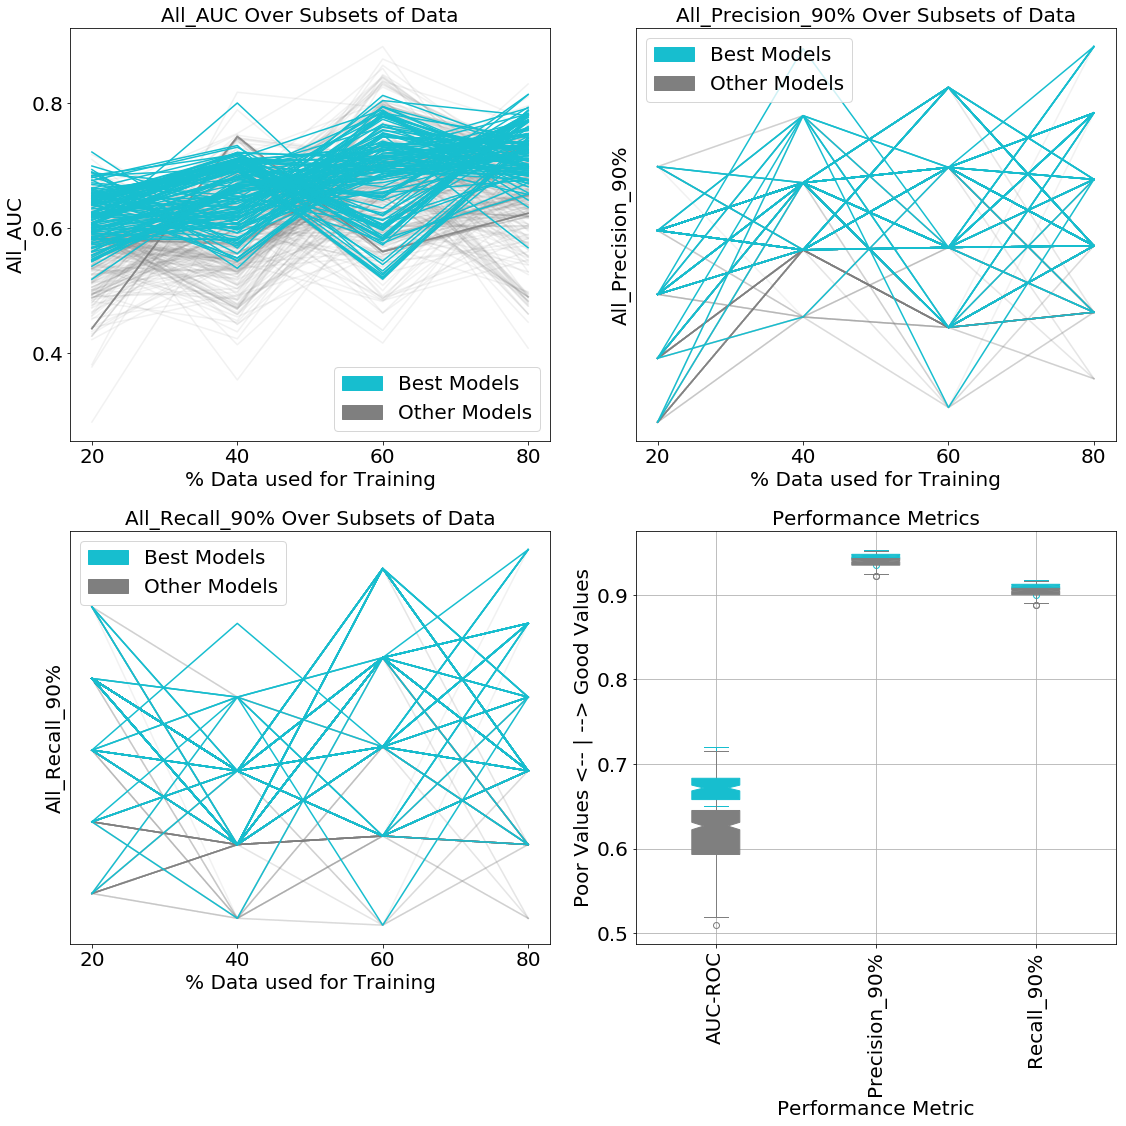

In [20]:
ModelPerformanceVis(ModelResults, current_palette)

# Feature Importance Visualizations

In [21]:
def SubplotMetricPerformance_BoxPlot(axes, df, BestModels, Feature):

    FeaturesClean = ['Spd Ratio', 'Spd Diff.', 'Mid Spd', 'Abrupt', 'Duration', 'Catch', 'Age', 'Young', 'Base SLA', 'Height', 'Weight','Bmi', 'Clinical']

    axes.set_title("Best Model Feature Imporance")
    df.loc[BestModels, Features].boxplot(ax=axes, rot=90);
    ##axes.boxplot(df.loc[BestModels, Features], orientation = 'vertical')

    #plt.setp(axes.set_xticklabels(FeaturesClean))
    axes.set_xticklabels(FeaturesClean)
    
    
    
    # Axis labels and title
    axes.set_xlabel('Features')
    axes.set_ylabel('Importance')
    
    
    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)
  

In [22]:
def SubplotMetricPerformance_Example(axes, df, BestModels, Feature, ExampleBestModelIndex=0):
    
    FeaturesClean = ['Spd Ratio', 'Spd Diff.', 'Mid Spd', 'Abrupt', 'Duration', 'Catch', 'Age', 'Young', 'Base SLA', 'Height', 'Weight','Bmi', 'Clinical']

    axes.set_title("Example Best Model Feature Imporance")
    
    fi = pd.DataFrame(columns = ['feature', 'importance'])
    for f in range(0, len(Features)):
        fi = fi.append({'feature': FeaturesClean[f], 'importance': df.loc[BestModels[ExampleBestModelIndex], Features[f]]}, ignore_index=True)
    
    # Make a bar chart
    axes.bar(fi.feature, fi.importance, orientation = 'vertical', color=current_palette[9])

    # Tick labels for x axis

    axes.set_xticks(fi.feature, FeaturesClean)
    plt.setp(axes.get_xticklabels(), rotation=90)
    
    # Axis labels and title
    axes.set_xlabel('Features')
    axes.set_ylabel('Importance')

    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] + axes.get_xticklabels() + axes.get_yticklabels() ): 
        item.set_fontsize(20)

In [23]:
def FeatureImportanceVis(df, Features):
    f2, ax2_array = plt.subplots(2, 2, sharex=False, figsize = (16, 16))
    
    Best_index = df[df['Best'] == 1].index.values
    
    Axes_Labels = np.ravel(ax2_array)
    
    SubplotMetricPerformance_BoxPlot(Axes_Labels[0], df, BestModels, Features)
    SubplotMetricPerformance_Example(Axes_Labels[1], df, BestModels, Features, 1)
    SubplotMetricPerformance_Example(Axes_Labels[2], df, BestModels, Features, 128)
    SubplotMetricPerformance_Example(Axes_Labels[3], df, BestModels, Features, 22)
    
    f2.tight_layout(pad=3)
    plt.savefig('FeatureImportance.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
    plt.show()

In [24]:
FeatureImportanceVis(ModelResults, Features)

NameError: name 'Features' is not defined

# Experimental Analysis: Identify models with similar feature importance with a cluster analysis

In [ ]:
from sklearn.cluster import KMeans

f, ax = plt.subplots(1, 1, sharex=False, figsize = (8, 8))

X=[]
X = ModelResults.loc[BestModels, Features].values

y_pred = KMeans(n_clusters=3).fit_predict(X)

x=X[:, 2]
plt.xlabel("Mid Speed")
y=X[:, 8] 
plt.ylabel("Base SLA")

#=X[:, 2]
#lt.xlabel("Mid Speed")
#=X[:, 4]
#lt.xlabel("Duration")

#x=X[:, 1]
#plt.xlabel("Speed Difference")
#y=X[:, 4]
#plt.xlabel("Duration")

#x=X[:, 8] 
#plt.xlabel("Base SLA")
#y=X[:, 4]
#plt.ylabel("Duration")

plt.scatter(x, y, c=y_pred)
plt.title("Feature Groupings")

txt=range(0, len(BestModels))
for i in range(0, len(BestModels)):
    ax.annotate(txt[i], (x[i], y[i]))
    
#plt.savefig('FeatureImportance_cluster.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    

# Intuition of the Models
Partial Dependence Plots

In order to make the partial dependency plots, I am going to need to re-train the one of the "best" models.

In [ ]:
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
df = pd.read_csv("../SQLDataBase.csv")
target_cols = 'AE'

df.loc[df[(df['date'] == '1916-01-01') ].index.values, 'order']= 1
df.loc[df[(df['date'] == '1917-01-01') ].index.values, 'order']= 2
df.loc[df[(df['date'] == '1918-01-01') ].index.values, 'order']= 3
df.loc[df[(df['date'] == '1919-01-01') ].index.values, 'order']= 4
df.loc[df[(df['date'] == '1920-01-01') ].index.values, 'order']= 5

Y, X = dmatrices(target_cols + ' ~ C(speed_ratio) + speed_diff + mid_speed+ C(abrupt) +base + duration + age + C(young) + height + weight + bmi +C(catch) + C(clinical) + order', df, return_type="dataframe")

feature_cols = ['C(speed_ratio)[T.3.0]', 'speed_diff', 'mid_speed', 'C(abrupt)[T.1.0]', 'base', 'duration', 'age', 'C(young)[T.1]', 'height', 'weight','bmi', 'C(catch)[T.1.0]', 'C(clinical)[T.1.0]']

df_Interactions = pd.concat([X,Y], axis=1)

Features = df_Interactions[feature_cols]
Target = df_Interactions[target_cols]

In [ ]:
TrainDictIndex = df_Interactions[(df_Interactions['order'] <= 4) ].index.values
TestDictIndex = df_Interactions[(df_Interactions['order'] == 5) ].index.values

X_train = Features.loc[TrainDictIndex]
X_test = Features.loc[TestDictIndex]
y_train = Target.loc[TrainDictIndex]
y_test = Target.loc[TestDictIndex]
y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)            

#SMOTTING
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = feature_cols)

X_train = os_data_X
y_train = os_data_y


In [ ]:
BestModelEG=132 # 131, 127, 125, 124 looks pretty good, 132 is really good

In [ ]:
model = eval(ModelResults.loc[BestModels[BestModelEG], "Model"]) #6 and 14 look good
EGC = model.fit(X_train, y_train)

In [ ]:
fig = plt.figure(figsize = (16, 16))

features = ['speed_diff', 'mid_speed', 'base', 'duration', 'age', 'bmi']
plot_partial_dependence(EGC, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()
fig.suptitle('Example best model: Partial Dependence Plots\n'
             + ModelResults.loc[BestModels[BestModelEG], "Model"])
fig.subplots_adjust(hspace=1)

In [ ]:
fig = plt.figure()

features = ('speed_diff', 'base')
pdp, axes = partial_dependence(EGC, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=60)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)
plt.suptitle('Example best model ('+ str(BestModelEG) + '): Partial Dependence Plots\n'
             + ModelResults.loc[BestModels[BestModelEG], "Model"])

plt.savefig('SpeedDiff_Base.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False)    
plt.show()

Trying a new plotting format:

In [ ]:
# Function from https://towardsdatascience.com/prettifying-partial-density-plots-in-python-1f7216937ff
def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=True, figsize=(10,9), norm_hist=True, dec=.5):
    # Get partial dependence
    pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    if y_pct and norm_hist:
        # Display yticks on ax2 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax2.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax2.set_yticklabels(labels)
        
    plt.savefig('Example_ParitalDependencyPlot_Nice.png', dpi=300, bbox_inches='tight', facecolor='w', transparent=False) 
    plt.show()
    
    if return_pd:
        return pardep

In [ ]:
plot_pdp(EGC, X_train, 'base', target='AE')